# 授業の概要

Pythonはよく使われているオープンソースのプログラミング言語です。

Pythonは、簡単な構文、豊富なライブラリ、そして高い可読性という特徴を持ち、特に、科学計算とデータ分析のコミュニティの発展に伴う、Pythonはデータサイエンス、機械学習、深層学習などの領域において、最も重要な言語の一つと変わっていきました。

この授業は、Pythonの基礎から始め、**計算社会科学研究ためのデータ操作・処理・分析用プログラムを書くための基本的な技術**を習得することを目的とします。


## 授業の内容

### Python

この授業は、Pythonの基礎から応用までカバーします。

- Pythonのデータ型: タプル、リスト、辞書などデータ型の特徴と操作方法
- Pythonの構文: 変数の宣言、演算子、制御構文（条件分岐、ループ）、関数の定義、クラスの定義、オブジェクト指向プログラミングの基本概念
- **Pythonの実践: ライブラリの使用** 
    - Pythonはデータ解析・機械学習のためのライブラリが充実しており、データ解析や機械学習の分野で最もよく使われている言語です。この授業は、その中に代表的かつ実用性の高いライブラリを紹介します。

#### NumPy
[**NumPy**](https://numpy.org/doc/)は、プログラミング言語Pythonにおいて数値計算を効率的に行うための拡張モジュールです。

効率的な数値計算を行うための型付きの多次元配列（numpy.ndarray）のサポートをPythonに加えるとともに、それらを操作するための大規模な高水準の数学関数ライブラリを提供します。

- 配列を作成するための関数は多く備えています

In [1]:
import numpy as np

In [2]:
a = np.zeros((2,2)) # すべて0の配列を作成
print(a)

[[0. 0.]
 [0. 0.]]


In [3]:
b = np.random.normal(
    loc   = 0,      # 平均
    scale = 1,      # 標準偏差
    size  = (2,2),# 出力配列のサイズ
) # 正規分布に従う乱数の配列を作成
print(b)

[[ 0.03295539 -1.18374294]
 [-0.93958118 -0.30156616]]


- 行列の操作と演算を行うにはNumPyを使うと便利です

In [4]:
arr1 = np.arange(4).reshape((2, 2))
print(arr1)

[[0 1]
 [2 3]]


In [5]:
arr2 = np.arange(6).reshape((2, 3))
print(arr2)

[[0 1 2]
 [3 4 5]]


In [6]:
arr1.reshape((1, 4))

array([[0, 1, 2, 3]])

In [7]:
# 転置
arr1.T

array([[0, 2],
       [1, 3]])

In [8]:
# 逆行列
np.linalg.inv(arr1)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [9]:
# 内積
np.dot(arr1, arr2)

array([[ 3,  4,  5],
       [ 9, 14, 19]])

#### pandas

[**pandas**](https://pandas.pydata.org/docs/)とは、データ解析を容易にする機能を提供するPythonのデータ解析ライブラリです。

Pandasの特徴は、データ操作のための高速で効率的なデータフレーム (DataFrame) という高いレベルのデータ構造データを提供しています。

csvやExcel、jsonなどのデータソースからデータを読み込んで操作することができます。そして、構造化されるデータ形式で、データの調整や変形など様々な処理が可能です。

```{margin}
Irisデータセットは、「花びら（petal）／がく片（sepal）の長さと幅（cm）」という4つの特徴量と、あやめの種類である「setosa／versicolor／virginica」という3つのラベルで構成される表形式データセット。
```

In [10]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
# 頻度を計算する
data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
# 統計量を計算する
data["sepal_width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [13]:
# speciesごとに指標の平均を計算する
data.groupby("species").mean().reset_index()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [14]:
# データフレームの変形
data.melt(id_vars=["species"], 
        var_name="features", 
        value_name="values")

,species,features,values
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3



#### matplotlib

 [**matplotlib**](https://matplotlib.org/stable/index.html)は、グラフ描画ライブラリでです。
 
 オブジェクト指向のAPIを提供しており、様々な種類のグラフを描画する能力を持っています。
 
 Pythonで使える可視化ためのライブライは他にもありますが、Matplotlibは最も広く使われているため、PandasやNumpyなどのライブライとうまく連携しやすくなっています。

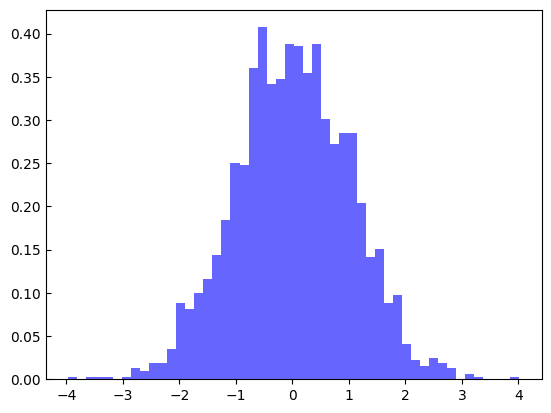

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = "out"
plt.rcParams['ytick.direction'] = "in"

normal = np.random.normal(0, 1, 2000)
plt.hist(normal, bins=50, density=True, alpha=0.6, color='b')
plt.show()

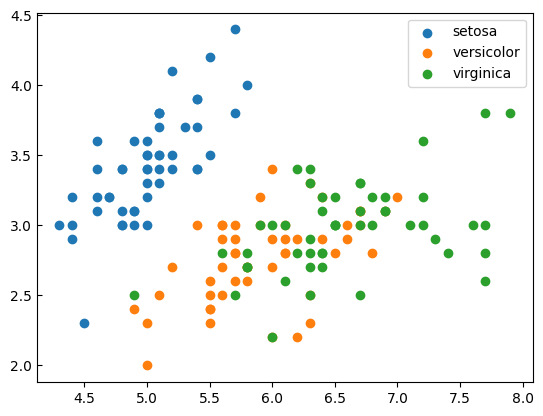

In [16]:
for i in data["species"].unique():
    plt.scatter(data[data["species"]==i]["sepal_length"],
    data[data["species"]==i]["sepal_width"], label=i)
plt.rcParams['xtick.direction'] = "out"
plt.rcParams['ytick.direction'] = "in"
plt.legend()

#### scikit-learn

[**scikit-learn**](https://scikit-learn.org/stable/)は機械学習ライブラリです。

NumPyやSciPyといった科学計算ライブラリと組み合わせて使用することができ、また、PandasやMatplotlibといったライブラリとの互換性も高く、機械学習モデルの開発、評価、デプロイまでを網羅する幅広い機能を提供しています。

初心者にも扱いやすいAPIを提供しており、教師あり学習、教師なし学習に関する[アルゴリズム](https://scikit-learn.org/stable/modules/classes.html)(SVM、Random Forest、回帰、クラスタリングなど)の効率的な実装、交差検証、グリッドサーチ、チューニングや特徴量の選択など機械学習に関する操作もサポートされています。

In [17]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# データセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# データセットの分割（学習用データとテスト用データ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

# ロジスティック回帰モデルのインスタンス化
logreg = LogisticRegression()

# 学習
logreg.fit(X_train, y_train)

# テストデータを用いた予測
y_pred = logreg.predict(X_test)

# 結果の表示
print("ロジスティック回帰モデルの予測の精度: {:.4f}".format(accuracy_score(y_test, y_pred)))

ロジスティック回帰モデルの予測の精度: 0.9600


In [18]:
from sklearn.svm import SVC
svm = SVC()

# SVMのインスタンス化
svm = SVC()

# 学習
svm.fit(X_train, y_train)

# テストデータを用いた予測
y_pred = svm.predict(X_test)

# 結果の表示
print("サポートベクターマシンの予測の精度: {:.4f}".format(accuracy_score(y_test, y_pred)))

サポートベクターマシンの予測の精度: 0.9600


#### 学習の到達目標

- データ構造、制御構造、オブジェクト指向などプログラミング言語の基礎概念について学ぶとともに、ある程度自由にPythonを用いて計算やデータ処理を実装できるようになることを目指す
- データ処理とデータ分析に必要なPythonライブラリの使い方を習得することを目指す
- Python環境の構築、パッケージ管理、コード管理に関する知識を習得し、Pythonを用いて再生可能なデータ解析を行えるようにことを目指す


### GitとGitHub

[Git](https://git-scm.com/)は「**パージョン管理システム(Version Control System)**」と呼ばれるものの一つです。

パージョン管理システムとは、一つのファイル、または複数のファイルの集合に対して、時間とともに加えられた変更を記録するシステムで、後から特定のバージョンを呼び出すことができるようにするためのものです。

ファイルの「パージョン(変更履歴)」を記録して、いつでも過去の状況に戻したり、過去の変更履歴を比較したり、またはどのタイミングで問題が起こっていたかを確認したり、様々なことができるプログラム開発やファイル管理を補助するシステムです。

[**GitHub**](https://github.com/)などの**リモートリポジトリ**と組み合わせることで、クラウドでデータと進捗を管理したり、他のメンバーとコードと情報を共有したり、個人のプロジェクトだけでなく、共同開発するときも強力なツールとなります。

![](./Figure/remote.png)

#### 学習の到達目標

- Gitを用いてプロジェクトを管理するスキルを把握するを目指す
- GitHubを用いて共同作業を進めるスキルを把握することを目指す

# 授業設計と成績評価

- 授業中実践的なプログラミング操作が多いので、必ずPCをご持参ください。
    - インターネットとの接続が必要される操作もありますので、PCのインターネット接続も事前に設定してください。
- 成績評価の分配は以下の通りです
    - 出席 ($30\%$): 授業で学んだ知識とスキルの応用を問う課題
    - 授業後の課題 ($70\%$): 授業の理解度を確認するためのプログラミング課題
        - 基本的に毎回の授業後には課題が出ます
        - 個人差がありますが、平均的には30分程度要する課題を想定しています
        - 最後の課題は、授業から学んだ知識とスキルを問う課題になります

# その他

- 授業の内容に関して不明点あるいはご要望があれば、随時[メール](<mailto:lyu.zeyu.e8@tohoku.ac.jp>)でご連絡ください。また、プログラミングやソフトウェア操作の質問については、Google ClassroomまたはGitHub Issueでも受け付けます。
- 授業のオフィスアワーは、できれば$1$日前アポイントを取ってくだい。
- 本授業ではプログラミングの事前知識は不要ですが、マニュアルに従ったコンピュータの操作やエラーメッセージを検索を含む基本的な情報リテラシーは望まれます。

# 授業の資料

この授業の資料は、[Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)形式で作成されたソースファイルを[Jupyter Book](https://jupyterbook.org/en/stable/intro.html)を用いて変換することで作成されたコンテンツになっている。


- 授業の資料はこちらの[リンク](https://lvzeyu.github.io/css_tohoku/)から閲覧できます。
- `.ipynb`形式のソースファイルの管理と共有には、GitHubと呼ばれる環境を利用していて、ソースファイルは[こちら](https://github.com/lvzeyu/css_tohoku)からも閲覧できる。
- [Google Colaboratory](https://colab.research.google.com/)というサービスを利用してGoogleのクラウド環境上でJupyter Nootebookを編集・実行することができます (手持ちのPCの動作に不安がある方は、Google Colaboratoryを利用してください)。
```{note}
Google Colaboratory上でノートブックを開くには、ロケットの形をしたボタンにマウスオーバーして”Colab”から開く。
```
![](./Figure/intro1.png)

# 次回の授業までに

- 演習ための環境を事前に整備してください
    - [**GitHub**](https://github.com/)アカウントを作ってください。
    - [公式サイト](https://git-scm.com/downloads)からGitをインストールしてください。
        - [Windows](https://prog-8.com/docs/git-env-win)
        - [Mac](https://prog-8.com/docs/git-env-win)
    - [VSCode](https://code.visualstudio.com/)をインストールしてください。

- 授業中では以上の作業に関する説明が省略しますので、不明点があれば必ず次回の授業までに聞いてください。


```{note}
Google Colab で Drive をマウントし、ディレクトリを変更するには、以下の手順を実行します。

- 以下のコードを実行して、Drive をマウントします。

`
from google.colab import drive
drive.mount('/content/drive')
`

- os.chdir() 関数を使用してディレクトリを変更できます。

```